<a href="https://colab.research.google.com/github/Saleh7127/pytorch-practice/blob/main/NN_scrach_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/refs/heads/master/data/clean_weather.csv', index_col=0)

In [5]:
df.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [6]:
df = df.ffill()

In [7]:
df.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


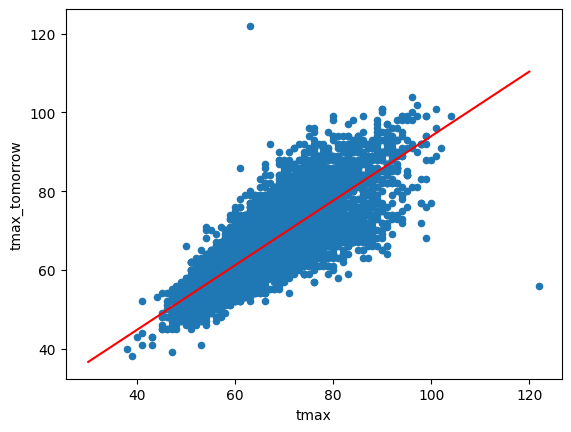

In [8]:
import matplotlib.pyplot as plt

df.plot.scatter('tmax','tmax_tomorrow')

pred = lambda x, w1=.82, b=11.99: x * w1 + b

plt.plot([30,120], [pred(30), pred(120)], 'red')

In [9]:
def mse(actual, pred):
  return np.mean((actual-pred)**2)


print(mse(df['tmax_tomorrow'], pred(df['tmax'])))
print(mse(df['tmax_tomorrow'], pred(df['tmax'], .83, 11.1)))

22.897335324598416
22.913301169590643


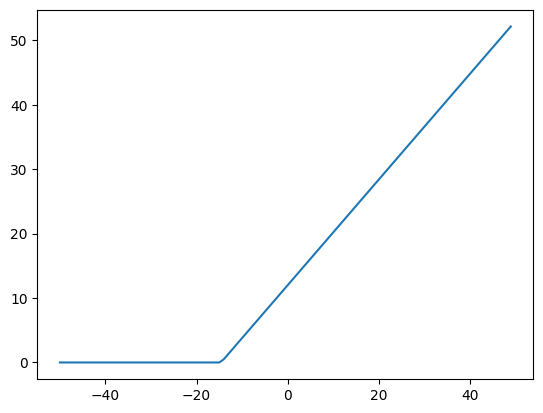

In [10]:
temps = np.arange(-50,50)
plt.plot(temps, np.maximum(0, pred(temps)))

$\hat{y} = w_{2} relu({w_{1}x + b_{1}}) + b_{2}$

(0.0, 40.0)

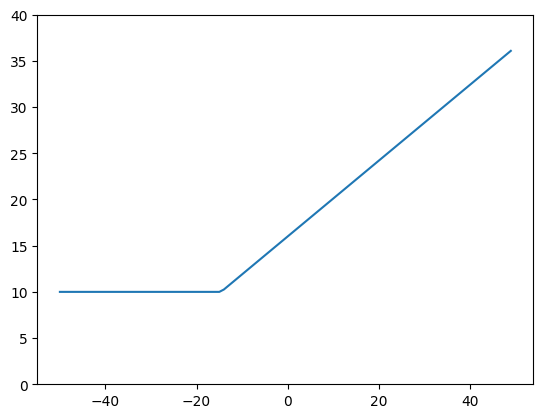

In [11]:
temps = np.arange(-50,50)

layer1 = np.maximum(0, pred(temps))
layer2 = pred(layer1, .5, 10)


plt.plot(temps, layer2)
plt.ylim(0,40)

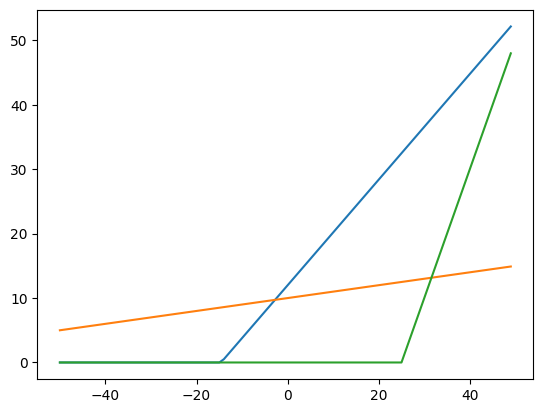

In [12]:
layer1_1 = np.maximum(0, pred(temps))
layer1_2 = np.maximum(0, pred(temps, .1, 10))
layer1_3 = np.maximum(0, pred(temps, 2, -50))

plt.plot(temps, layer1_1)
plt.plot(temps, layer1_2)
plt.plot(temps, layer1_3)

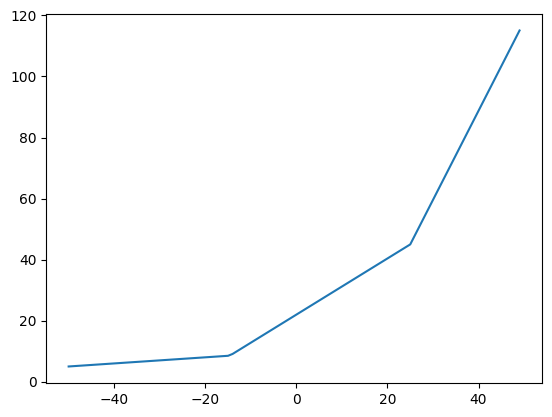

In [13]:
plt.plot(temps, layer1_1+layer1_2+layer1_3)

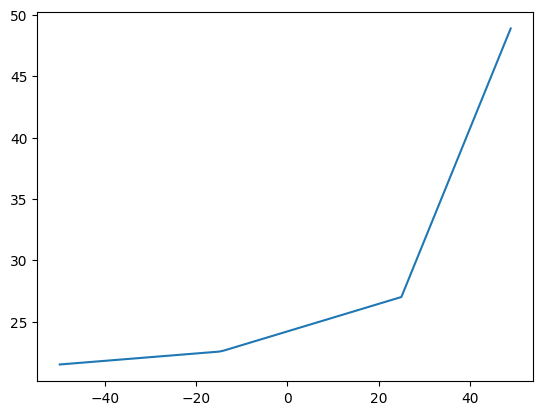

In [14]:
layer2 = layer1_1*.1 + layer1_2*.3 + layer1_3*.4 + 20
plt.plot(temps, layer2)

In [15]:
input = np.array([[80], [90], [100], [-20], [-10]])


l1_weights = np.array([[.82, .1]])
l1_bias = np.array([[11.99, 10]])
l1_output = input @ l1_weights + l1_bias
l1_output

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [-4.41,  8.  ],
       [ 3.79,  9.  ]])

In [16]:
l1_activated = np.maximum(l1_output,0)
l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

In [17]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

output = l1_activated @ l2_weights + l2_bias
output

array([[47.395],
       [51.695],
       [55.995],
       [ 6.6  ],
       [ 8.695]])

In [18]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [19]:
tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [20]:
def mse(actual, pred):
  return (actual-pred)**2


mse(tmax_tomorrow, output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [ 313.113025]])

In [21]:
def mse_grad(actual, pred):
  return (pred - actual)

mse_grad(tmax_tomorrow, output)

array([[-35.605],
       [-37.305],
       [-39.005],
       [ 28.6  ],
       [ 17.695]])

In [22]:
output_gradient = mse_grad(tmax_tomorrow, output)

l2_w_gradient = l1_activated.T @ output_gradient
l2_w_gradient

array([[-9562.0038],
       [-1741.73  ]])

In [23]:
l2_b_gradient = np.mean(output_gradient, axis = 0)
l2_b_gradient

array([-13.124])

In [24]:
l2_weights

array([[0.5],
       [0.2]])

In [25]:
lr = 1e-5

l2_bias = l2_bias - l2_b_gradient * lr
l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

array([[0.59562004],
       [0.2174173 ]])

In [26]:
l1_activated_gradient = output_gradient @ l2_weights.T
l1_activated_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [ 17.03473309,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [27]:
temps = np.arange(-50,50)
activation = np.maximum(0,temps)

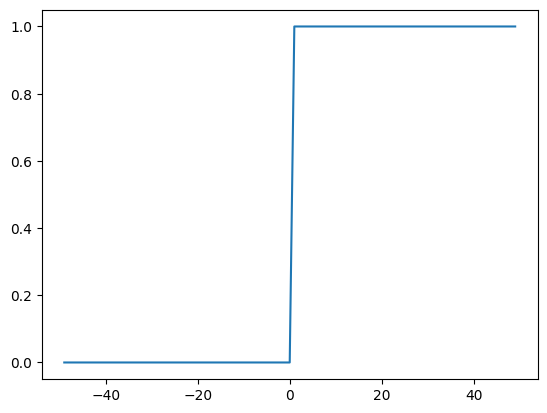

In [37]:
# Plot the input temperatures against the derivative of relu (the slope)
# np.roll will shift the values to the right one place, so we subtract the previous value
plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

In [28]:
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
l1_output_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [  0.        ,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [29]:
l1_w_gradient = input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis =0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [30]:
l1_weights

array([[0.8812494, 0.1236013]])

# Backpropagation
Here is the algorithm we followed:

1. Run the network forward pass, and get the output:
2. Compute gradient with respect to the outputs of the network. (the mse_grad function)
3. For each layer in the network:
* Compute the gradient with respect to the pre-nonlinearity output (if the layer has a nonlinearity).
* Compute the gradient with respect to the weights.
* Compute the gradient with respect to the biases.
* Compute the gradient with respect to the inputs to the layer.

4. Update the parameters in the network using gradient descent

For convenience, we combined step 4 into step 3. But it's important to note that backpropagation is step 3 above, and gradient descent is step 4. Splitting these steps up makes it easier to use variations of regular gradient descent to update the weights (like Adam or RMSProp).

Steps 3 and 4 are usually called the backward pass of a neural network.

Backpropagation and gradient descent are the most complicated parts of training neural networks. Intuitively, backpropagation is about reversing the forward pass of the network so that we can figure out how to reduce error. To do this, we pass the loss gradient from layer to layer (applying the chain rule).

# Batch Size
In the example above, we used a batch size of 5. This means that we did the forward and backward pass using 5 inputs from the training dataset. Larger batch sizes will use more memory, since we need to create larger matrices. But they will also run faster, since we can process more examples at once.

Batch size also affects gradient descent. When we process 1 example at a time, we do a backward pass using the gradient of that single example. With a larger batch size, we're averaging the gradient over every example in the batch when we update weights and biases. This means that we may lose some accuracy in the updates when the batch size is too high.

When the batch size is the same as the rows in the training data, then the update process is called batch gradient descent (confusing, I know!). Otherwise, it is called stochastic gradient descent. Either way, we still use backpropagation to find the gradients.

# Network implementation

In [31]:
from sklearn.preprocessing import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our df so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative

scaler = StandardScaler()
df[PREDICTORS] = scaler.fit_transform(df[PREDICTORS])

split_df = np.split(df, [int(.7 * len(df)), int(.85 * len(df))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_df]

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


To train our neural network, we need 4 elements:

* A way to initialize our parameters (weights and biases for each layer)
* A forward pass that computes predictions using the parameters
* A loss function that measures the error of our predictions
* A backward pass that updates our parameters to reduce the loss

To initialize our weight parameters, we can use random initialization. Random initialization helps the gradient descent algorithm descend to a global minimum efficiently (feel free to experiment with other initializations, like 0 or 1 to see what happens).

It's common to initialize the bias to be 1 or 0.

We'll shrink the initial parameter values so we don't end up with predictions that are too large (this can cause gradient descent to take steps that are too large).

In [32]:
def init_layers(inputs):
  layers = []
  for i in range(1, len(inputs)):
    layers.append([
        np.random.rand(inputs[i-1], inputs[i]) / 5 - .1,
        np.ones((1, inputs[i]))
    ])

  return layers

layer_config = [3, 10, 10, 1]

layers = init_layers(layer_config)

layers

[[array([[ 0.06956767,  0.07384275, -0.06667276,  0.01228157, -0.00834601,
          -0.07263752, -0.05610789,  0.00224797,  0.03601892, -0.01542342],
         [-0.08029398, -0.00922975, -0.07759154,  0.02254565, -0.09462168,
          -0.06558127, -0.04906656, -0.07549119, -0.0413105 ,  0.08183799],
         [-0.0594512 ,  0.00385184, -0.06638916,  0.01875019,  0.01127653,
          -0.07791091, -0.01180712, -0.044723  , -0.00281951,  0.05098647]]),
  array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])],
 [array([[-3.16093173e-02,  4.87326030e-02, -7.22437054e-02,
           4.07118701e-02, -2.36705442e-03,  8.50648216e-02,
           5.74274191e-02, -6.48315128e-02,  9.88353518e-02,
           1.67634590e-02],
         [ 2.58635844e-02,  7.08529304e-03,  7.90454558e-02,
           2.01609249e-02, -1.14599459e-02,  7.58100355e-02,
          -9.01763909e-02, -3.46782443e-04,  8.88666191e-02,
          -8.02185326e-02],
         [ 9.14580146e-02,  5.67562953e-02, -7.11981580e-02,
        

In [40]:
def forward(batch, layers):
  hidden = [batch.copy()]

  for i in range(len(layers)):
    batch = np.matmul(batch, layers[i][0]) + layers[i][1]
    if i<len(layers) -1:
      batch = np.maximum(batch, 0)

    hidden.append(batch.copy())
  return batch, hidden


def mse(actual, pred):
  return (actual - pred) ** 2

def mse_grad(actual, pred):
  return (pred - actual)


def backward(layers, hidden, grad, lr):
  for i in range(len(layers)-1, -1, -1):
    if i!= len(layers)-1:
      grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

    w_grad = hidden[i].T @ grad
    b_grad = np.mean(grad, axis=0)

    layers[i][0] -= w_grad * lr
    layers[i][1] -= b_grad * lr

    grad = grad @ layers[i][0].T

    return layers

In [48]:
from statistics import mean

lr = 1e-3
epochs=100
batch_size = 8

layers = init_layers(layer_config)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss ** 2))

        layers = backward(layers, hidden, loss, lr)


    valid_preds, _ = forward(valid_x, layers)

    print(f"Epoch: {epoch} Train MSE: {mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}")


Epoch: 0 Train MSE: 86.45601076098926 Valid MSE: 66.01874533892969
Epoch: 1 Train MSE: 63.15059176690754 Valid MSE: 64.7049892997832
Epoch: 2 Train MSE: 61.99403376735055 Valid MSE: 63.42969470648388
Epoch: 3 Train MSE: 60.8709647501264 Valid MSE: 62.19174034937422
Epoch: 4 Train MSE: 59.78041302920387 Valid MSE: 60.99003762233927
Epoch: 5 Train MSE: 58.72143511999426 Valid MSE: 59.82352957587495
Epoch: 6 Train MSE: 57.69311492081191 Valid MSE: 58.69118999764483
Epoch: 7 Train MSE: 56.69456291809273 Valid MSE: 57.59202251972558
Epoch: 8 Train MSE: 55.72491541468105 Valid MSE: 56.52505975176849
Epoch: 9 Train MSE: 54.78333378051523 Valid MSE: 55.489362439323
Epoch: 10 Train MSE: 53.86900372506183 Valid MSE: 54.484018646593654
Epoch: 11 Train MSE: 52.9811345908674 Valid MSE: 53.508142962920424
Epoch: 12 Train MSE: 52.118958667614564 Valid MSE: 52.56087573229425
Epoch: 13 Train MSE: 51.28173052608762 Valid MSE: 51.64138230523911
Epoch: 14 Train MSE: 50.46872637146959 Valid MSE: 50.7488523

In [49]:
layers[0]

[array([[-0.00578618,  0.07551393, -0.04285077,  0.00530034, -0.06632035,
          0.03510063,  0.04092319,  0.0229408 ,  0.07933471, -0.00663509],
        [-0.08602536,  0.05340578,  0.03990243, -0.04218535, -0.06993744,
         -0.0034107 , -0.08261942, -0.06320253,  0.06351536, -0.07230982],
        [-0.08171995, -0.03557625,  0.00052467,  0.07187896,  0.01343877,
         -0.03709419, -0.04189575,  0.01804627,  0.05125027, -0.09149413]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])]

In [50]:
pred, _ = forward(test_x, layers)
np.mean(mse(test_y, pred))

np.float64(26.23376412764093)